## Import Dependencies
We will need to import these packages below for an easier data exploration.

In [1]:
import numpy as np # linear algebra
import pandas as pd # Data processing
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns # Plotting library (better visualizations)
import plotly as py
import plotly.graph_objs as go
import warnings
import os # File navigation (to access csv)

In [2]:
# Read the csv file
df = pd.read_csv(r'C:\Users\ayu\Documents\marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.shape

(2240, 28)

A view of dataset's columns and its data types.

In [4]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

We won't be using ID for this Analysis.

In [5]:
df.drop('ID', axis = 1, inplace = True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,16,...,2,7,1,0,0,0,0,1,0,SP


Check are there any missing values.

In [6]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
# This is optional, but now we can see that the income column has null values in it.
df.iloc[449]

Year_Birth                   1986
Education              Graduation
Marital_Status             Single
 Income                       NaN
Kidhome                         1
Teenhome                        0
Dt_Customer             2/20/2013
Recency                        19
MntWines                        5
MntFruits                       1
MntMeatProducts                 3
MntFishProducts                 3
MntSweetProducts              263
MntGoldProds                  362
NumDealsPurchases               0
NumWebPurchases                27
NumCatalogPurchases             0
NumStorePurchases               0
NumWebVisitsMonth               1
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Response                        0
Complain                        0
Country                       AUS
Name: 449, dtype: object

In [8]:
# Remove unnecessary space in "Income" column
df.columns = df.columns.str.replace(' ', '')

In [9]:
# To check
df.dtypes

Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

### Processing the Income
Now the income is formatted as a USD Currency like "$2,000.00" and I would like to change it as an integer value.

Before we continue, note that the Income column has an "object" dtype, and to change it into integer dtype, we must go through several steps beforehand; as some errors may arise such as:
* Could not convert string to float
* ValueError: invalid literal for int() with base 10

### Regular Expression
Simply put, stripping the '$' sign commas, and the '.00' from the values helps python knows that our values is applicable to be converted into float.

In [10]:
# Remove $
df['Income']=df['Income'].replace({'\$':''}, regex = True)
# Remove Comma
df['Income']=df['Income'].replace({'\,':''}, regex = True)
# Remove .00
df['Income']=df['Income'].replace({'\.00':''}, regex = True)

In [11]:
# Convert to float
df['Income']=df['Income'].astype(float)
df['Income'].dtype

dtype('float64')

### It works!

Before changing to integer (int64), first fill the missing values otherwise "error cannot convert non-finite values" could arise.

Now that we have converted the column into float dtype, let's check its values.

In [12]:
df['Income'].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

### Filling the missing values
After the column is changed to float dtype, now we can alter the missing values (NaN) to be filled with numbers. Out of many methods of filling missing values, I choose to fill them with the mean value of Income column. 

In [13]:
# Get Mean Value from Income Column only, and round it to have that '.0' at the end
mean_value=float(round(df['Income'].mean()))
mean_value

52247.0

In [14]:
# Now fill the value with '.fillna' and use our mean_value
df['Income']=df['Income'].fillna(value=mean_value)
#Check how many null values there are
df['Income'].isnull().sum()

0

In [15]:
# Now we can change to int
df['Income']=df['Income'].astype(np.int64)
df['Income'].dtype

dtype('int64')

In [16]:
df['Income'].head()

0    84835
1    57091
2    67267
3    32474
4    21474
Name: Income, dtype: int64

## Continue to other Columns
Let's continue analyzing categorical columns; which are **Education**, **Marital Status**, and **Country**.

No.of.unique values : 5
unique values : ['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']


<AxesSubplot:xlabel='count', ylabel='Education'>

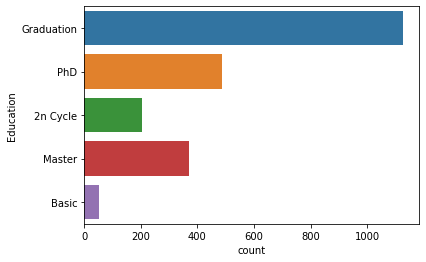

In [17]:
def uniqED():
    cnt=0
    x=[]
    for i in range(0, len(df['Education'])):
        if df['Education'][i] not in x: 
            x.append(df['Education'][i])
            cnt += 1
    print("No.of.unique values :",cnt)
    print("unique values :",x)
uniqED()

sns.countplot(y="Education", data=df)

## There are two outliers
**2n Cycle and Graduation**. 

Since we don't know exactly what is **2n Cycle**, we can change the value to Undisclosed.

For **Graduation**, obviously every other degrees has some sort of graduation. In this context, let's replace it with **Undergraduate** value.

In [18]:
df['Education']=df['Education'].replace(to_replace ="2n Cycle",value ="Undisclosed")
df['Education']=df['Education'].replace(to_replace ="Graduation",value ="Undergraduate")

<AxesSubplot:xlabel='count', ylabel='Education'>

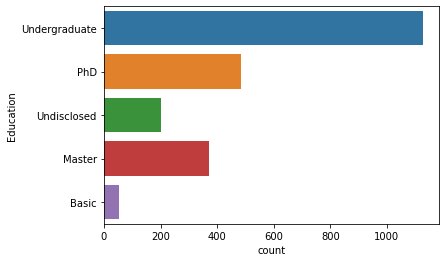

In [19]:
# Re-check the count plot
sns.countplot(y="Education", data=df)

## More outliers!

Let's explore another categorical column.

No.of.unique values : 8
unique values : ['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone', 'Absurd']


<AxesSubplot:xlabel='count', ylabel='Marital_Status'>

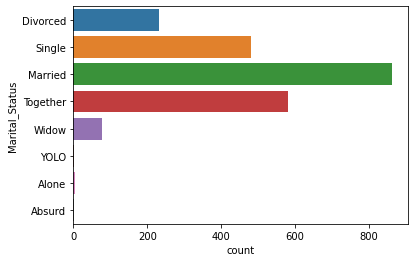

In [20]:
def uniqMS():
    cnt=0
    x=[]
    for i in range(0, len(df['Marital_Status'])):
        if df['Marital_Status'][i] not in x: 
            x.append(df['Marital_Status'][i])
            cnt += 1
    print("No.of.unique values :",cnt)
    print("unique values :",x)
uniqMS()
sns.countplot(y="Marital_Status", data=df)

### Let's process the outliers

We can process those outliers by:
- Replace "Alone" to "Single"
- Remove rows that contains "YOLO" and "Absurd"

In [21]:
# Replace alone to single
df['Marital_Status']=df['Marital_Status'].replace(to_replace ="Alone",value ="Single")

In [24]:
# Get index(es) that has YOLO and Absurd in it
index_names = df[ (df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd') ].index

In [25]:
# Check how many index as result
index_names

Int64Index([103, 104, 1068, 1339], dtype='int64')

In [26]:
# Drop the rows based on indexes
df.drop(index_names, inplace = True)

In [27]:
# Reset the index for neat purposes
df = df.reset_index(drop=True)

<AxesSubplot:xlabel='count', ylabel='Marital_Status'>

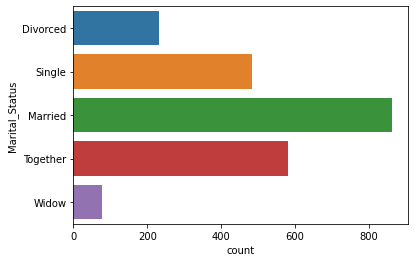

In [28]:
# Check again the countplot
sns.countplot(y="Marital_Status", data=df)

### Moving on
Let's analyze our final categorical column, **Country**.

No.of.unique values : 8
unique values : ['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME']


<AxesSubplot:xlabel='count', ylabel='Country'>

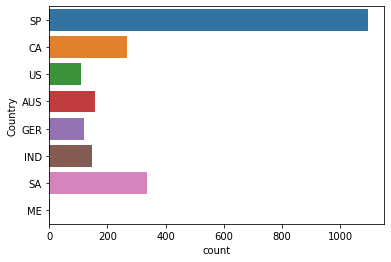

In [29]:
def uniqC():
    cnt=0
    x=[]
    for i in range(0, len(df['Country'])):
        if df['Country'][i] not in x: 
            x.append(df['Country'][i])
            cnt += 1
    print("No.of.unique values :",cnt)
    print("unique values :",x)
uniqC()
sns.countplot(y="Country", data=df)

Initials often used as a country indicator widely. But assuming this dataset will be used for further visualizations (e.g. Tableau), I replaced every single one with its full country name. This step is optional.

In [30]:
df['Country']=df['Country'].replace(to_replace ="SP",value ="Spain")
df['Country']=df['Country'].replace(to_replace ="CA",value ="Canada")
df['Country']=df['Country'].replace(to_replace ="US",value ="United States")
df['Country']=df['Country'].replace(to_replace ="AUS",value ="Australia")
df['Country']=df['Country'].replace(to_replace ="GER",value ="Germany")
df['Country']=df['Country'].replace(to_replace ="IND",value ="India")
df['Country']=df['Country'].replace(to_replace ="SA",value ="South Africa")
df['Country']=df['Country'].replace(to_replace ="ME",value ="Montenegro")

<AxesSubplot:xlabel='count', ylabel='Country'>

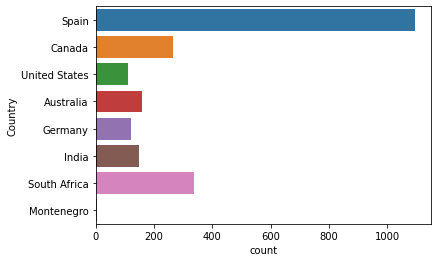

In [31]:
sns.countplot(y="Country", data=df)

## Scatterplots
Out of curiosity, we can see the correlation between our categorical columns to **Income** column using scatterplots.

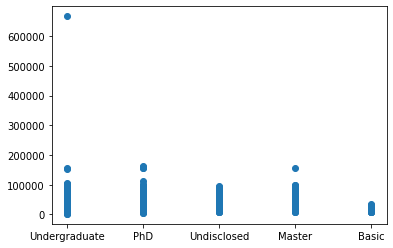

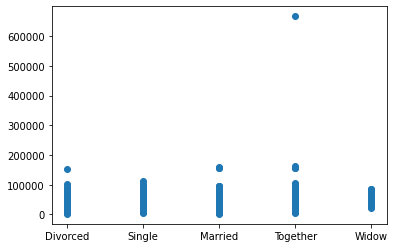

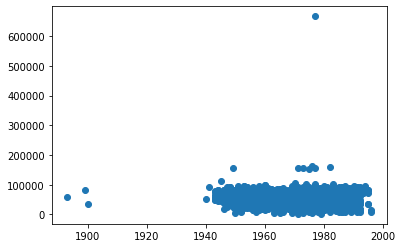

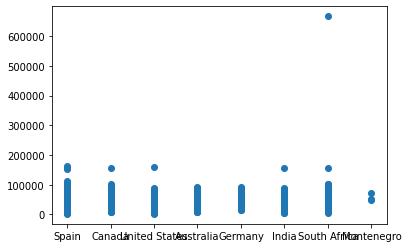

In [32]:
plt.scatter(df['Education'],df['Income'])
plt.show()

plt.scatter(df['Marital_Status'],df['Income'])
plt.show()

plt.scatter(df['Year_Birth'],df['Income'])
plt.show()

plt.scatter(df['Country'],df['Income'])
plt.show()

There is a tiny dot on the top of all our visualization, indicating there is a very high value in Income column that is out of the ordinary. We can track that easily by finding the max value of Income column.

In [33]:
df.loc[df['Income'] == df['Income'].max()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
525,1977,Undergraduate,Together,666666,1,0,6/2/2013,23,9,14,...,3,6,0,0,0,0,0,0,0,South Africa


From the code above it already checks out our visualizations; containing the correct Education and Marital_Status column. But we should make sure its Year_Birth accuracy (you can add country too).

In [34]:
df.loc[((df['Income'] == df['Income'].max()) & (df['Marital_Status'] == 'Together') &
       (df['Year_Birth'] > 1970) & (df['Year_Birth'] < 1980))]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,1977,Undergraduate,Together,666666,1,0,6/2/2013,23,9,14,...,3,6,0,0,0,0,0,0,0,South Africa


In [54]:
# Create variable to contain the index
index_names=df.loc[df['Income'] == df['Income'].max()].index
index_names

Int64Index([525], dtype='int64')

In [55]:
# Drop the row, then reset index
df.drop(index_names, inplace = True)
df = df.reset_index(drop=True)

## "Better" Data.
Now we can see we have achieved an arguably better data with a more spread out points in the scatterplot below.

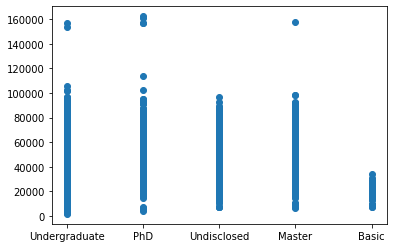

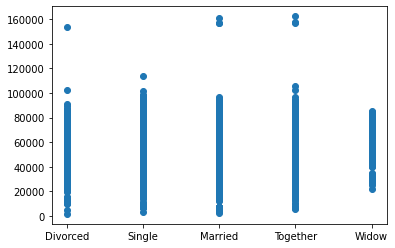

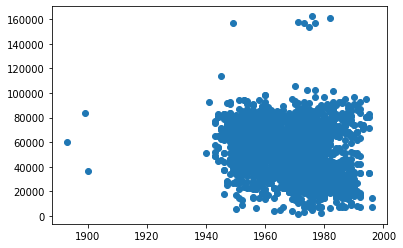

In [56]:
plt.scatter(df['Education'],df['Income'])
plt.show()

plt.scatter(df['Marital_Status'],df['Income'])
plt.show()

plt.scatter(df['Year_Birth'],df['Income'])
plt.show()

## More Visualizations
Codes below are some examples of analysis with Python. This part relies heavily on what you as an analyst or scientist want to look for.

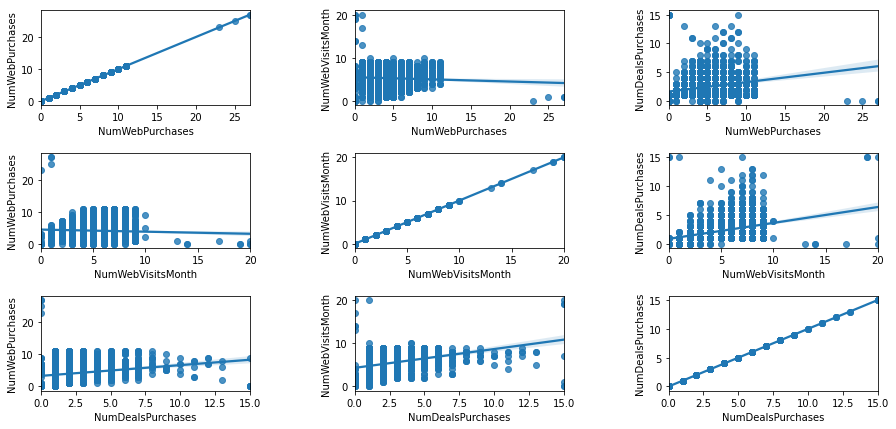

In [57]:
# We can run subplots, this example uses three columns (you can change the columns used to what you want to explore)
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['NumWebPurchases' , 'NumWebVisitsMonth' , 'NumDealsPurchases']:
    for y in ['NumWebPurchases' , 'NumWebVisitsMonth' , 'NumDealsPurchases']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

<AxesSubplot:>

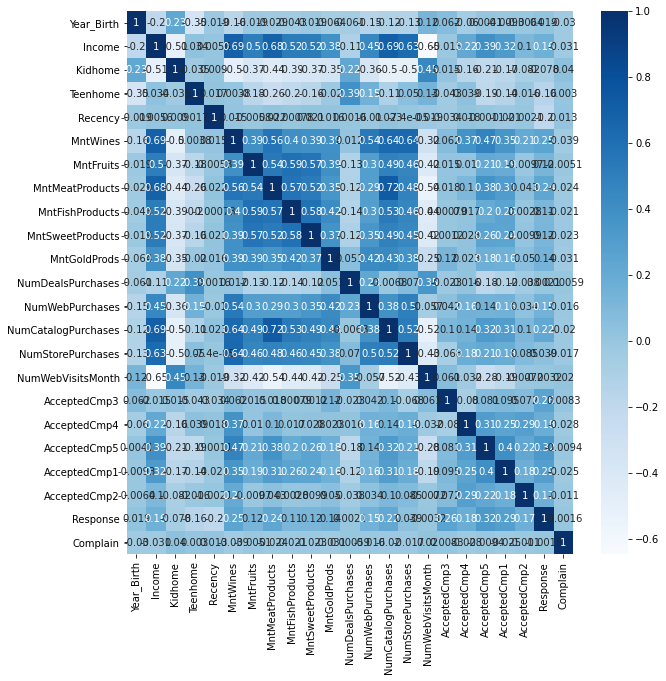

In [59]:
# Create confusion matrix 
# in the example below, there are too many columns in this dataset.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Based on Androidkt.com,
- A positive correlation (Above 0 value) coefficient means that there is a perfect positive relationship between the two variables.
- A correlation coefficient of (-) represents a perfect negative correlation. This means when one increases, the other decreases and vice-versa.
- A value of 0, means that there is no correlation between the two and they are not related to each other at all.

You can read more on:
https://androidkt.com/plot-correlation-matrix-and-heatmaps-between-columns-using-pandas-and-seaborn/

In [64]:
# Create new dataframe by copying the original, with columns we want to analyze
dfnew = df[['Year_Birth', 'Income', 'NumWebPurchases','NumStorePurchases', 'NumWebVisitsMonth']].copy()
dfnew.head()

,Year_Birth,Income,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835,4,6,1
1,1961,57091,7,7,5
2,1958,67267,3,5,2
3,1967,32474,1,2,7
4,1989,21474,3,2,7


<AxesSubplot:>

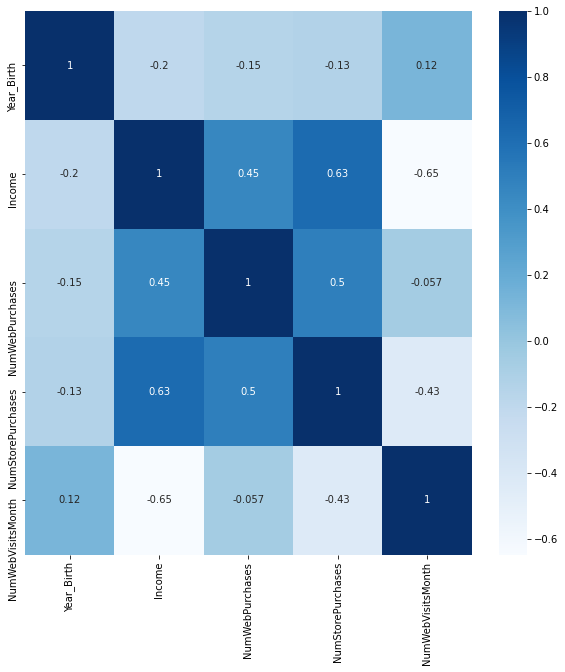

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(dfnew.corr(),cbar=True,annot=True,cmap='Blues')

From just 5 selected columns, we can see that:
- Biggest positive correlation is NumStorePurchases with Income (0.63).
- Biggest negative correlation is NumWebVisitsMonth with Income (-0.65).

## End

There are many visualizations and analysis can be done after this, before being implemented for business objectives. I hope this simple demonstration depicts Exploratory Data Analysis well enough to be referenced. Thank you!
